## Car Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


In [233]:
## importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [234]:
## importing dataset
cars = pd.read_csv('CarPrice_Assignment.csv')

#### Checking out the data

In [235]:
## head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [236]:
## To display all columns
pd.set_option('display.max_columns',None)

In [237]:
## head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [238]:
## shape
cars.shape

(205, 26)

In [239]:
## null values and dtypes
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- There are 26 columns and 205 rows
- No null values and for now all dtypes seem to be in order

In [240]:
## outliers
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [241]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

- Some indication of outliers 
- Mean and standard deviation have a significant difference.
- The rise from min to max is not gradual
- Steep rise between 75% and max..
- Warrants further investigation 

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [242]:
# symboling: -2 (least risky) to +3 most risky
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

- Most cars are 0,1,2

#### aspiration: An (internal combustion) engine property showing  whether the oxygen intake is through standard (atmospheric pressure) or through turbocharging (pressurised oxygen intake)

In [243]:
##aspiration
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

#### drivewheel: frontwheel, rearwheel or four-wheel drive 

In [244]:
##drivewheel
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

#### # wheelbase: distance between centre of front and rarewheels

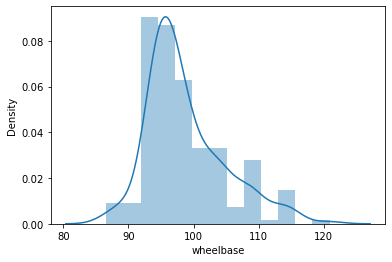

In [245]:
import seaborn as sns
sns.distplot(cars['wheelbase'])
plt.show()

#### curbweight: weight of car without occupants or baggage

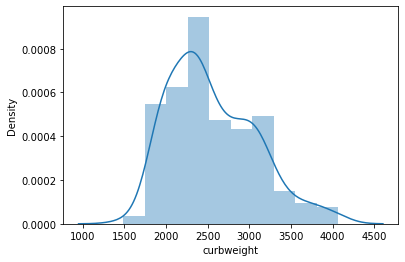

In [246]:
## curbweight
sns.distplot(cars['curbweight'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [247]:
## all numeric variables in the dataset
cars_numeric= cars.select_dtypes(include=['float','int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [248]:
cars_numeric = cars_numeric.drop(['symboling','car_ID'],axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [249]:
## correlation matrix
cars_numeric.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

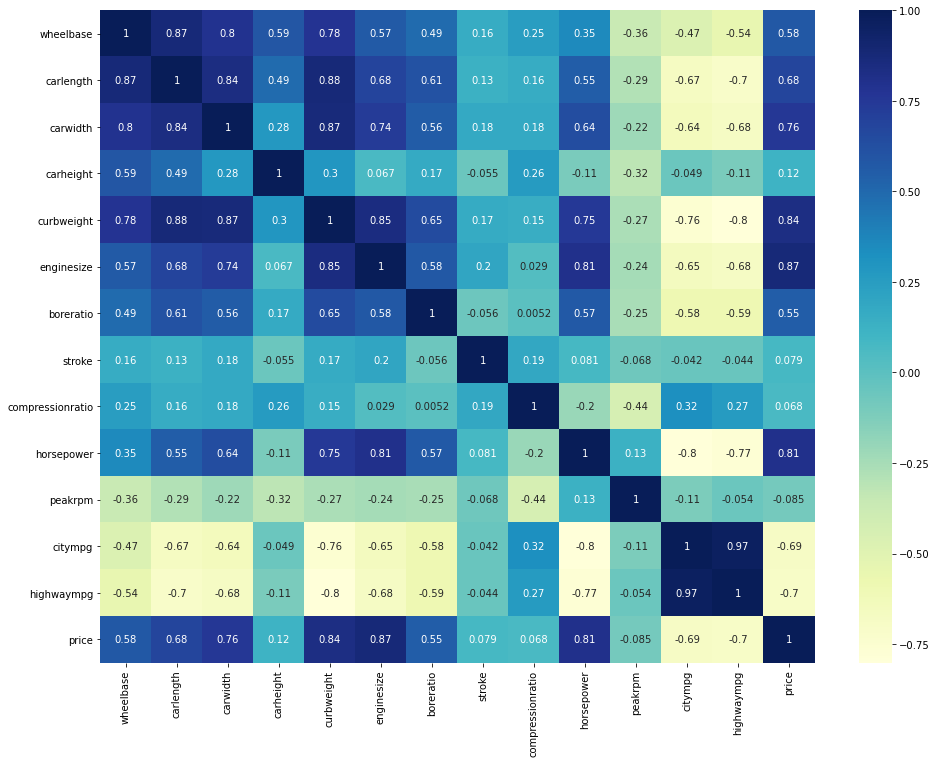

In [250]:
## plotting heatmap
plt.figure(figsize=(16,12))
sns.heatmap(cars_numeric.corr(),cmap='YlGnBu',annot=True)
plt.show()

## The heatmap shows some useful insights:

### Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize,boreratio, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

### Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [251]:
## checking null values and dtypes
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [252]:
## converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Next, we need to extract the company name from the column ```CarName```. 

In [253]:
cars['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

 Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.
Thus, we need to simply extract the string before a space. There are multiple ways to do that.

Let's create a new column to store the compnay name and check whether it looks okay.

In [254]:
## we will use lambda function and split function
cars['car_company'] = cars['CarName'].apply(lambda x: x.split()[0])

In [255]:
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
Nissan          1
toyouta         1
mercury         1
vokswagen       1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [256]:
## correcting missplelled names
cars['car_company'] = cars['car_company'].replace(['toyouta','porcshce','vw','Nissan','maxda','vokswagen'],['toyota','porsche','volkswagen','nissan','mazda','volkswagen'])

In [257]:
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

- The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [258]:
cars = cars.drop('CarName',axis=1)

In [259]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [260]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [261]:
## outliers
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [262]:
## let's have a look at the dataframe
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Creating X and y lables

In [263]:
## y-label
y = cars.pop('price')
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [264]:
y.shape

(205,)

In [265]:
## X-label
X = cars
X.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [266]:
X.shape

(205, 25)

In [267]:
## now we dont need car_ID, so we can drop it
cars = cars.drop('car_ID',axis=1)
cars.shape

(205, 24)

### Now we need to create dummy variables for all the categorical columns

In [268]:
## creating sub-dataframe from X of all categorical columns
cars_categorical = X.select_dtypes(include = 'object')
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [269]:
cars_categorical.shape

(205, 11)

In [270]:
## creating dummy variables
cars_dummies = pd.get_dummies(cars_categorical,drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Now we will drop all the categorical variables from X and then concat cars_dummies with X

In [271]:
## making a variable cols containing all the categorical variables from X
cols = cars_categorical.columns

In [272]:
## dropping categorical varaibles from X
X = X.drop(cols,axis=1)

In [273]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [274]:
## concatenating cars_dummies with X
X = pd.concat([X,cars_dummies],axis=1)

In [275]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [276]:
## dropping car_ID
X = X.drop('car_ID',axis = 1)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [277]:
X.shape

(205, 68)

- Now we have a dataset with all numerical values.
- We can go aheacd with model building

# 4. Model Building and Evaluation

- Before we start building models, we first need to scale the features as well always scale features before applying ridge or lasso.
- During scaling the columns loose their name as the dataframe gets converted to a numpy  array.
- so we have to make sure that we retain the column names

In [278]:
## making a variable X_cols to save column names
X_cols = X.columns

In [279]:
## importing libraries
from sklearn.preprocessing import scale

In [280]:
## scaling X
X = pd.DataFrame(scale(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,-1.188177,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [281]:
## assigning names
X.columns = X_cols
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.346726,-0.696784,-0.598010,-0.430083,2.567604,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.346726,-0.696784,1.672213,-0.430083,-0.389468,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,-0.188025,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014,5.318432,-0.201517,-0.201517,-0.121867,-0.214286,-0.260208,-0.141069,-0.121867,-0.300708,-0.070014,-0.260208,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-0.346726,-0.696784,-0.598010,2.325134,-0.389468,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,-1.188177,-0

- Now X and y are ready to be fed into the models

### Note: Here we have scaled the dummy variables as well
- Explore in future projects whether we need to do this
- After completing this project, make another copy and proceed without scaling dummy variables.

### Train-Test Split
- Before building models we also have to do train:test split

In [282]:
## importing libraries
from sklearn.model_selection import train_test_split

In [283]:
## splitting into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [284]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (143, 68)
X_test shape: (62, 68)
y_train shape: (143,)
y_test shape: (62,)


## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [285]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [286]:
## instantiating object
lr = LinearRegression()
## fitting into model
lr.fit(X_train,y_train)
## making predictions on train and test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [287]:
## getting model coefficients 
print('Intercept:',lr.intercept_)
print('Betas',lr.coef_)

Intercept: 13400.718964448775
Betas [ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.15665864e+03
  5.50557360e+02  6.45972107e+01  1.55937229e+02  9.01690070e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.78808440e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03  4.54747351e-13
 -2.08926886e+02 -5.83874480e+01 -2.50111043e-12  5.21573928e+02
  2.39504091e+03  3.76793525e+02 -1.83326364e+02 -6.98406228e+02
 -5.19749514e+02  6.03320099e+01 -4.92211850e+02  3.10813552e+02
  2.27373675e-13 -1.05964701e+03  3.61145168e+02 -4.85

### Model Metrics: For both train and test
- RSS
- R-Squared: r2 score
- MSE

In [288]:
## importing libraries
from sklearn.metrics import r2_score,mean_squared_error

In [289]:
## making a list metric to hold these values
metric = []
## r2_score: R-Squared = 1 - RSS/TSS
r2_train = r2_score(y_train,y_pred_train)
metric.append(r2_train)
r2_test = r2_score(y_test,y_pred_test)
metric.append(r2_test)
print('r2_train:',r2_train)
print('r2_test:',r2_test)

r2_train: 0.9756892503873289
r2_test: 0.8382621393399063


- Substantial gap between the two, indicating overfitting

In [290]:
## RSS = 𝛴(y - y_pred)²
RSS_train = np.sum(np.square(y_train - y_pred_train))
metric.append(RSS_train)
RSS_test = np.sum(np.square(y_test - y_pred_test))
metric.append(RSS_test)
print('RSS_train:',RSS_train)
print('RSS_test:',RSS_test)

RSS_train: 210406502.3536522
RSS_test: 702234087.1202456


- Huge gap between the two,indicating overfitting

In [291]:
## MSE = RSS/N
MSE_train = mean_squared_error(y_train,y_pred_train)
metric.append(MSE_train)
MSE_test = mean_squared_error(y_test,y_pred_test)
metric.append(MSE_test)
print('MSE_train:',MSE_train)
print('MSE_test:',MSE_test)

MSE_train: 1471374.1423332323
MSE_test: 11326356.243874928


In [303]:
metric

[0.9756892503873289,
 0.8382621393399063,
 210406502.3536522,
 702234087.1202456,
 1471374.1423332323,
 11326356.243874928]

- Huge gap between the two,indicating overfitting

# Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

# Ridge Regression

### List of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting

In [292]:
## making a dictionary called params to hold all the values of alpha
## for hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

- verbose = 1; we want the grid search cv to return an output
- on the basis of highest 'neg_mean_absolute_error',we will choose best alpha(lambda)
- grid search; to get optimal alpha or lambda from amongs the 28 values used in params

In [293]:
## importing libraries
from sklearn.linear_model import Ridge

In [294]:
## instantiating model object
ridge = Ridge()

- Since we have 28 values of `alpha(lambda)`, we need to find the best alpha
- Making 28 models for each alpha and visualisng them to compare and select the best model for a given alpha(lambda) would be too cumbersome!
- So, we use `cross-validation` using `GridSearchCV`  to find the best value of `alpha(lambda)`
- What `GridSearchCV` does is that for a given model( fed into it as estimator), it will build all the models in the background for all the values of alphas and give the alpha corresponding to the best model based on some parameter, for eg we have chosen `neg_mean_absolute_error` as that parameter for our models here.

###  Cross-validation using GridSearchCV to find the best value of alpha(lambda)

In [295]:
## importing libraries
from sklearn.model_selection import GridSearchCV

In [296]:
## making grid search
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)

In [297]:
## fitting X_train and y_train into model_cv
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [298]:
## getting the best value for aplha
print(model_cv.best_params_)

{'alpha': 10.0}


###  Now that we have the best value of alpha for the ridge model,let's make the ridge model fitting this value of alpha into it.

In [299]:
## Building ridge regresson model for alpha=10
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [300]:
## getting the values for betas
ridge_betas = ridge.coef_
print(ridge_betas)

[ 3.66439600e+02 -3.84733269e+01  1.48385910e+03 -4.28871390e+02
  1.32508938e+03  1.53232524e+03 -1.32353686e+02 -3.43961178e+02
 -3.85991151e+01  1.00274451e+03  4.08530524e+02  3.06226713e+01
 -3.86573031e+01  2.80260386e+02  2.25689703e+02  1.15232435e+02
  3.11172714e+01  2.20999290e+02 -2.36604555e+02  4.37146732e+02
  8.11201095e+01 -4.17761691e+01 -6.36303725e+02 -3.89525755e+02
 -2.67865922e+02 -2.25694801e+02  2.17304590e+02  1.01331104e+03
 -7.99719800e+01 -2.11299602e+02  3.80633116e+02  5.02569921e+01
 -2.68490049e+01  1.31276809e+02 -5.38964122e+02 -5.61768987e+02
 -2.24243763e+02  3.30958997e+02 -3.41292337e+02  1.31276809e+02
  9.03941997e+01 -1.92932138e+02  2.36604555e+02 -2.06485472e-28
 -6.35149689e+01 -1.25417650e+02 -2.06485472e-28  3.66335476e+02
  1.54082286e+03  1.04052995e+03 -1.83880719e+02 -4.32144537e+02
 -3.65503794e+02 -6.64424355e+01  8.30476815e+02 -2.68159702e+02
 -2.06485472e-28 -7.10103895e+02 -4.24309992e+02 -3.22453130e+02
 -3.35256307e+02  5.94116

In [301]:
## making predictions
y_ridge_pred_train = ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)

###  Let's calculate some metrics such as R2 score, RSS and RMSE

In [302]:
## we will make a list metric2 to hold all these values
metric2 = []

## r2_score: R-Squared = 1 - RSS/TSS
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
metric2.append(r2_train_ridge)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
metric2.append(r2_test_ridge)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

## RSS = 𝛴(y - y_pred)²
RSS_train_ridge = np.sum(np.square(y_train - y_ridge_pred_train))
metric2.append(RSS_train_ridge)
RSS_test_ridge = np.sum(np.square(y_test - y_ridge_pred_test))
metric2.append(RSS_test_ridge)
print('RSS_train:',RSS_train_ridge)
print('RSS_test:',RSS_test_ridge)

## MSE = RSS/N
MSE_train_ridge = mean_squared_error(y_train,y_ridge_pred_train)
metric2.append(MSE_train_ridge)
MSE_test_ridge = mean_squared_error(y_test,y_ridge_pred_test)
metric2.append(MSE_test_ridge)
print('MSE_train:',MSE_train_ridge)
print('MSE_test:',MSE_test_ridge)

print(metric2)


r2_train: 0.9588720781564705
r2_test: 0.9224482262406618
RSS_train: 355957028.1477885
RSS_test: 336714599.959351
MSE_train: 2489209.987047472
MSE_test: 5430880.644505661
[0.9588720781564705, 0.9224482262406618, 355957028.1477885, 336714599.959351, 2489209.987047472, 5430880.644505661]


## Lasso

- The procedure is the same as above, with some little modifications

In [304]:
## dictionary of params values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [305]:
## importing libraries
from sklearn.linear_model import Lasso

In [306]:
## instantiating object
lasso = Lasso()

In [309]:
## importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [310]:
## doing grid searcch to get best value of alpha from params list
folds = 5
model_cv_lasso = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,scoring='neg_mean_absolute_error',return_train_score=True,verbose=1)

In [311]:
## fitting into  model_cv_lasso
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [312]:
## getting best value of alpha
print(model_cv_lasso.best_params_)

{'alpha': 100}


- The best value for alpha is 100, so we will build lasso model with alpha=100

### Building lasso model for alpha=100

In [313]:
## instantiating object
lasso = Lasso(alpha=100)
## fitting X_train and y_traion into the object
lasso.fit(X_train,y_train)

Lasso(alpha=100)

In [319]:
## making predictions
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

In [320]:
## getting values for betas
betas_lasso = lasso.coef_
betas_lasso

array([   0.        ,   -0.        , 1747.1052243 ,  -82.23183774,
       1780.64173078,  788.28807799,   -0.        ,   -0.        ,
          0.        , 1017.48820119,   84.89633333,    0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
          0.        ,  246.519852  ,  -73.38572878,  120.56790634,
          0.        ,    0.        , -187.60748943,    0.        ,
        -96.25412649, -134.39227325,  294.27227486, 1218.02281069,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,   -0.        , -202.47407284,
         -0.        ,  197.70712322,   -0.        ,    0.        ,
         -0.        ,   -0.        ,   58.81424436,   -0.        ,
          0.        ,   -0.        ,   -0.        ,  186.35685239,
       1805.30123983, 1210.72936345,    0.        ,   -0.        ,
         -0.        ,   78.54297249,  796.29612837,    0.        ,
         -0.        , -397.80411254,  -58.198149  , -377.78256

- Many `Zeros` as `lasso` does `feature selection`.

###  Let's calculate some metrics such as R2 score, RSS and RMSE

In [321]:
## we will make a list metric2 to hold all these values
metric3 = []

## r2_score: R-Squared = 1 - RSS/TSS
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
metric3.append(r2_train_lasso)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
metric3.append(r2_test_lasso)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

## RSS = 𝛴(y - y_pred)²
RSS_train_lasso = np.sum(np.square(y_train - y_lasso_pred_train))
metric3.append(RSS_train_lasso)
RSS_test_lasso = np.sum(np.square(y_test - y_lasso_pred_test))
metric3.append(RSS_test_lasso)
print('RSS_train:',RSS_train_lasso)
print('RSS_test:',RSS_test_lasso)

## MSE = RSS/N
MSE_train_lasso = mean_squared_error(y_train,y_lasso_pred_train)
metric3.append(MSE_train_lasso)
MSE_test_lasso = mean_squared_error(y_test,y_lasso_pred_test)
metric3.append(MSE_test_lasso)
print('MSE_train:',MSE_train_lasso)
print('MSE_test:',MSE_test_lasso)

print(metric3)



r2_train: 0.9464707035896383
r2_test: 0.9111235629694681
RSS_train: 463289376.5351321
RSS_test: 385884068.0216489
MSE_train: 3239785.8498960286
MSE_test: 6223936.580994337
[0.9464707035896383, 0.9111235629694681, 463289376.5351321, 385884068.0216489, 3239785.8498960286, 6223936.580994337]


- The difference between R-Squared(r2 score) between test and train is smaller for Ridge, hence ridge is a better model. 
- Lasso may have included some of the varaible noise in the model while excluding some important variable.

## We will put all the metrics from the three models i.e Linear, Ridge and Lasso into a dataframe for better Comparison.

In [323]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS (Train)',
  'RSS (Test)',
  'MSE (Train)',
  'MSE (Test)'],
 'Linear Regression': [0.9756892503873289,
  0.8382621393399063,
  210406502.3536522,
  702234087.1202456,
  1471374.1423332323,
  11326356.243874928]}

In [326]:
## now we will convert this table into a dataframe
lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
lr_metric

,Metric,Linear Regression
0,R2 Score (Train),9.756893e-01
1,R2 Score (Test),8.382621e-01
2,RSS (Train),2.104065e+08
3,RSS (Test),7.022341e+08
4,MSE (Train),1.471374e+06
5,MSE (Test),1.132636e+07


In [328]:
## Now we will create 2 pd series for Ridge and Lasso
## and we will concat these series to the dataframe lr_metric

## series for Ridge
rg_metric = pd.Series(metric2,name='Ridge Regression')
## series for Lasso
las_metric = pd.Series(metric2,name='Lasso Regression')

## concatenating both series to dataframe lr_metric
final_metric = pd.concat([lr_metric,rg_metric,las_metric],axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.756893e-01,9.588721e-01,9.588721e-01
1,R2 Score (Test),8.382621e-01,9.224482e-01,9.224482e-01
2,RSS (Train),2.104065e+08,3.559570e+08,3.559570e+08
3,RSS (Test),7.022341e+08,3.367146e+08,3.367146e+08
4,MSE (Train),1.471374e+06,2.489210e+06,2.489210e+06
5,MSE (Test),1.132636e+07,5.430881e+06,5.430881e+06


## Lets observe the changes in the coefficients after regularization

In [329]:
## creating a dataframe
betas = pd.DataFrame(index=X.columns)
betas

""
wheelbase
carlength
carwidth
carheight
curbweight
...
car_company_saab
car_company_subaru
car_company_toyota
car_company_volkswagen


In [330]:
## fill the rows of betas with X.columns vales
betas.rows = X.columns
betas

""
wheelbase
carlength
carwidth
carheight
curbweight
...
car_company_saab
car_company_subaru
car_company_toyota
car_company_volkswagen


In [332]:
## defining columns 
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [333]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
wheelbase,1.288048e+03,3.664396e+02,0.000000
carlength,-1.049552e+03,-3.847333e+01,-0.000000
carwidth,1.688346e+03,1.483859e+03,1747.105224
carheight,-1.259041e+03,-4.288714e+02,-82.231838
curbweight,2.420271e+03,1.325089e+03,1780.641731
enginesize,1.162634e+04,1.532325e+03,788.288078
boreratio,-4.850390e+03,-1.323537e+02,-0.000000
stroke,-1.134241e+03,-3.439612e+02,-0.000000
compressionratio,-2.569520e+03,-3.859912e+01,0.000000
horsepower,-9.736448e+02,1.002745e+03,1017.488201
